In [1]:
# import pandas
import pandas as pd

#import numpy
import numpy as np


#import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#creating Dataframe object
df = pd.read_csv('Customer_churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values.

In [12]:
df.drop(['customerID'],axis=1,inplace=True)

# LabelEncoder

Now we will replace the catagorical data into numeric data.

In [10]:
# Encoding Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#Convert all the non-numeric columns to numerical data types
for column in df.columns:
    if df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    df[column] = LabelEncoder().fit_transform(df[column])

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Making DataFrame for the Nominal Data

In [15]:
df_visualization_nominal=df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

# Visualization of Data

for visualization of data we will use countplot method of seaborn.

In [16]:
import seaborn as sns

1    3555
0    3488
Name: gender, dtype: int64


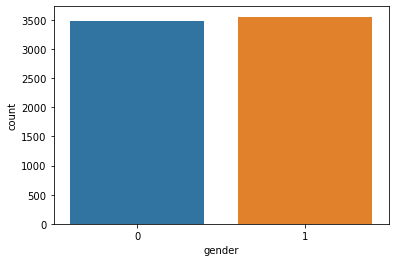

In [17]:
ax=sns.countplot(x="gender",data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

from the above observation the total number of male(0) is 3488 and female is 3555.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


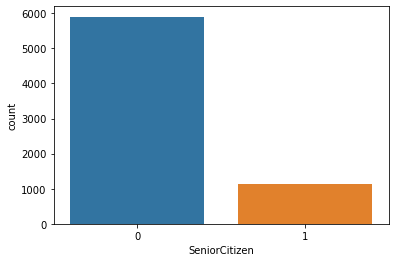

In [18]:
ax=sns.countplot(x="SeniorCitizen",data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

from the above observation the total number of Senior Citizen is (0) is 5901 and Younger(1) is 1142.

0    3641
1    3402
Name: Partner, dtype: int64


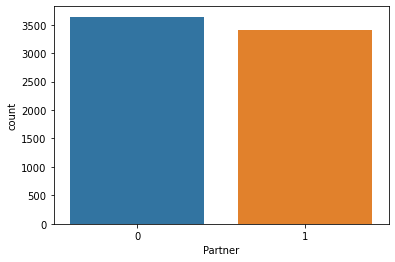

In [19]:
ax=sns.countplot(x="Partner",data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

The number of partner is equal.

0    4933
1    2110
Name: Dependents, dtype: int64


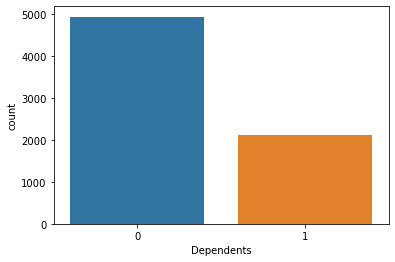

In [20]:
ax=sns.countplot(x="Dependents",data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

4933 persons have no dependency and 2110 have dependency.

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


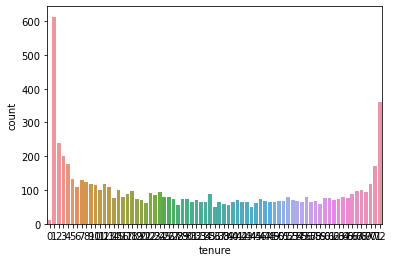

In [21]:
ax=sns.countplot(x="tenure",data=df_visualization_nominal)
print(df_visualization_nominal['tenure'].value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


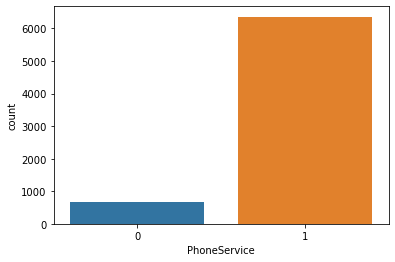

In [22]:
ax=sns.countplot(x="PhoneService",data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

6361 persons has phone service.

0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64


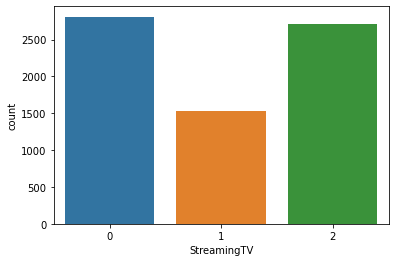

In [26]:
ax=sns.countplot(x="StreamingTV",data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())


1    3096
0    2421
2    1526
Name: InternetService, dtype: int64


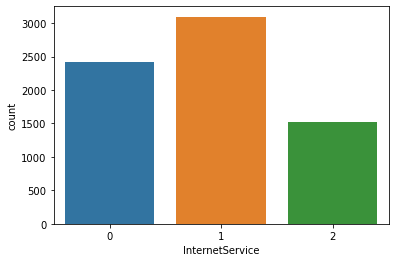

In [27]:
ax=sns.countplot(x="InternetService",data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

2421 person has DSL connection, 3096 has Fiber Optic and 1526 has no internet connection.

1    4171
0    2872
Name: PaperlessBilling, dtype: int64


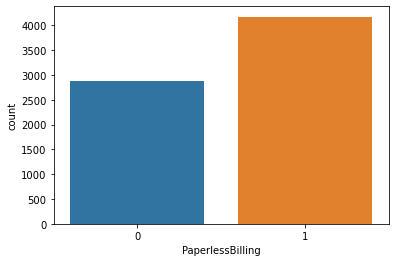

In [28]:
ax=sns.countplot(x="PaperlessBilling",data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

4171 person did paper less biling and 2872 person did paper biling.

we know that there is no significant difference for people doing churn in terms of gender and telephone service (Phone Service). However, there is a tendency that people who churn are people who do not have a partner (partner: No), people whose status is a senior citizen (Senior Citizen: Yes), people who have streaming TV services (StreamingTV: Yes) , people who have Internet service (internetService: Yes) and people who have paperless bills (PaperlessBilling: Yes).

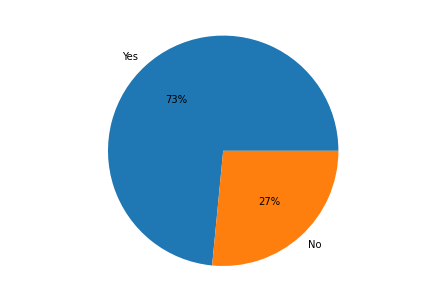

In [29]:
# see univariate data visualization related to the percentage of churn data from customers
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

we know that the data distribution as a whole, the customer does not churn, with details on Churn as much as 26% and No Churn as much as 74%.we know that the data distribution as a whole, the customer does not churn, with details on Churn as much as 26% and No Churn as much as 74%.

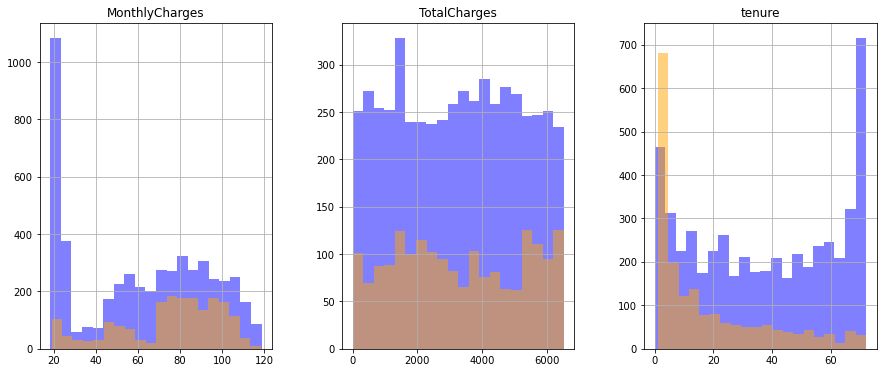

In [31]:
# choose a numeric variable predictor and make a bivariate plot, then interpret it

# creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# use the following code to plot two overlays of histogram per each numerical_features, 
# use a color of blue and orange, respectively
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

we can see that for MonthlyCharges there is a tendency that the smaller the value of the monthly fees charged, the smaller the tendency to do Churn. For TotalCharges there doesn't seem to be any inclination towards Churn customers. For tenure, there is a tendency that the longer the customer subscribes, the less likely it is to churn.

# Skewness

In [32]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

-we are first calculating the skew value and some of the column skew value are far from zero.
-The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [33]:
skew=('PhoneService','SeniorCitizen')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [34]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

# Correlation

In [35]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

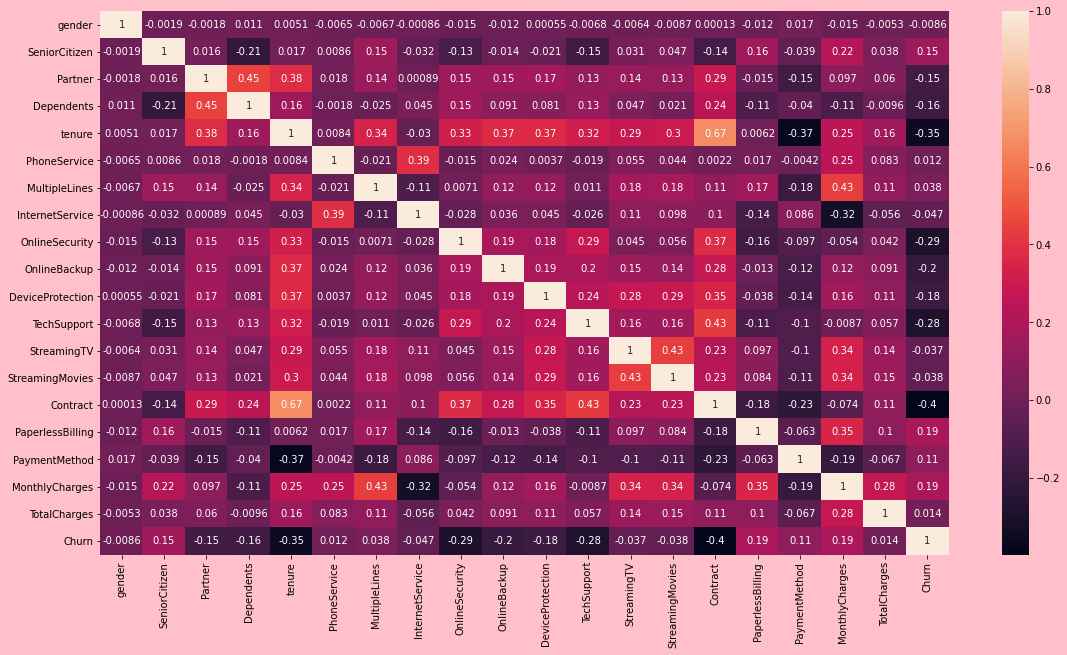

In [36]:
# plotting heatmap
plt.figure(figsize=[19,10],facecolor='pink')
sns.heatmap(df.corr(),annot=True)

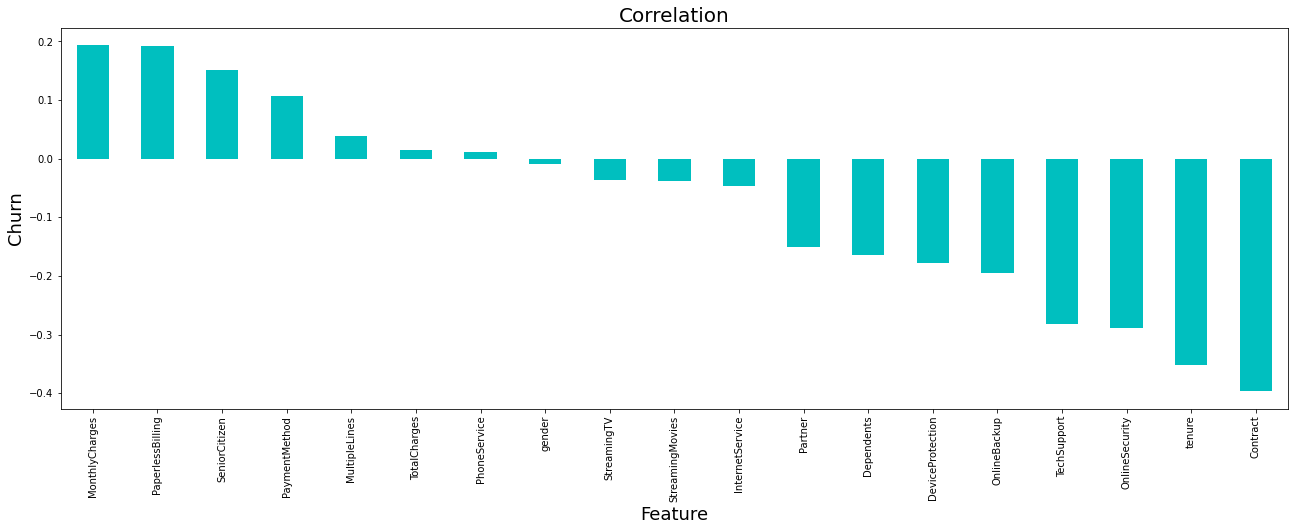

In [37]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Churn',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

By this we can say that MonthlyCharges is in Highest correlation and Contact are in negative correlation.

In [38]:
from sklearn.preprocessing import power_transform
df1=power_transform(df)

df=pd.DataFrame(df,columns=df.columns)

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(7043, 20)

In [40]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [41]:
len(np.where(z>3)[0])

682

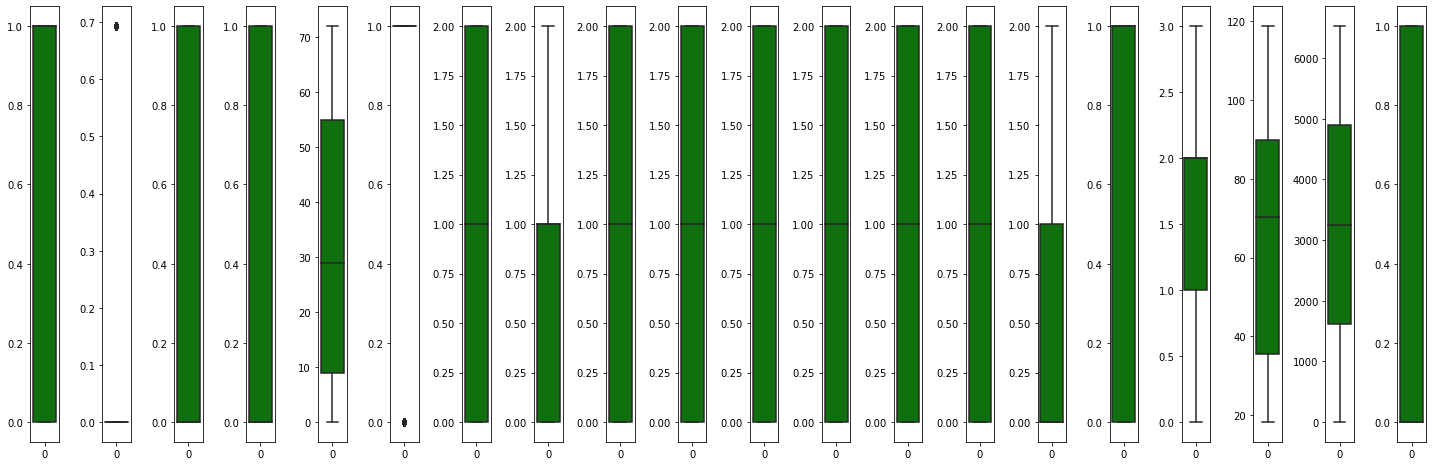

In [43]:
import seaborn as sns
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[collist[i]],color='green',orient='v')
    plt.tight_layout()

No Outlier is present so we can proceed.

In [44]:
x = df.drop(columns = ['Churn'],axis=1)
y = df['Churn']

# Scalling the data using Min-Max Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
maxAcc=0
MaxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        MaxRs=i
print("Best Accuracy is",maxAcc,"on random state", MaxRs)
    

Best Accuracy is 0.8232789212207239 on random state 24


We saw that we get 82% accuracy at random state 24

In [48]:
def models(x_train, y_train):
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(random_state = 12)
    log.fit(x_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2)
    knn.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 12)
    svc_lin.fit(x_train, y_train)

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 12)
    svc_rbf.fit(x_train, y_train)

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =12)
    tree.fit(x_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=12)
    forest.fit(x_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classsifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [49]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8033368832090877
[1]K Nearest Neighbor Training Accuracy: 0.8288959886403976
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.802626908058218
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7367767128150515
[4]Gaussian Naive Bayes Training Accuracy: 0.7589634362797302
[5]Decision Tree Classsifier Training Accuracy: 0.9984025559105432
[6]Random Forest Classifier Training Accuracy: 0.981008164714235


# Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN +FP)))
    cr=classification_report(y_test,model[i].predict(x_test))
    print(cr)
    print('\n')

[[904 119]
 [172 214]]
Model[0] Testing Accuracy = "0.7934705464868701 !"
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1023
           1       0.64      0.55      0.60       386

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



[[896 127]
 [236 150]]
Model[1] Testing Accuracy = "0.7423704755145494 !"
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1023
           1       0.54      0.39      0.45       386

    accuracy                           0.74      1409
   macro avg       0.67      0.63      0.64      1409
weighted avg       0.72      0.74      0.73      1409



[[913 110]
 [181 205]]
Model[2] Testing Accuracy = "0.7934705464868701 !"
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           

# Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.7998026082327891


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of Random Forest Classifier is:",scr.mean())

cross validation score of Random Forest Classifier is: 0.7917088400864573


In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation score of Decision Tree Classifieris:",scr.mean())

cross validation score of Decision Tree Classifieris: 0.7227031784308666


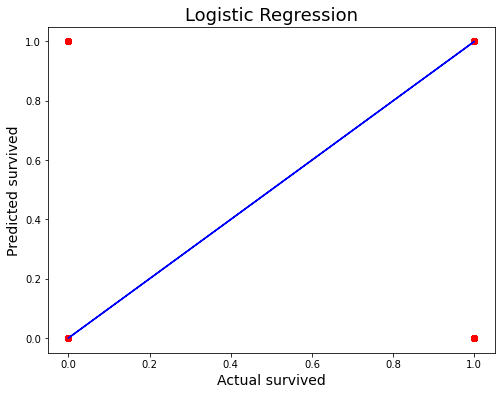

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual survived',fontsize=14)
plt.ylabel('Predicted survived',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Hyper Tunning Parameter

In [55]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [56]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [57]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7877927608232789

# AUC-ROC Curve

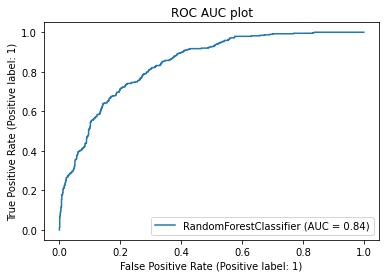

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Conclusion

In [60]:
import pickle
filename='Customer_churn.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [61]:
import pickle
loaded_model=pickle.load(open('Customer_churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

78.77927608232788


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["Predicted","original"])

In [63]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
original,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


# After training or testing the model with different Classifier. Almost all models are giving accuracy above 70%. But the Highest accuracy is given by RandomForest Classifier That is 78%. And we do Cross validation the Model gives 78% score for cross validation. AUC curve is also giving 84% .